In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model


In [5]:
X_train_scaled = np.load(r"C:\games\git\Anomaly-detection-DEPI\src\data\UNSW-NB15\processed\X_train_scaled.npy")
X_all_scaled = np.load(r"C:\games\git\Anomaly-detection-DEPI\src\data\UNSW-NB15\processed\X_all_scaled.npy")
y = np.load(r"C:\games\git\Anomaly-detection-DEPI\src\data\UNSW-NB15\processed\labels.npy")
model = load_model(r"C:\games\git\Anomaly-detection-DEPI\src\models\autoencoder_model.h5", compile=False)

In [6]:
recon_all = model.predict(X_all_scaled, verbose=1)
mse = np.mean(np.square(recon_all - X_all_scaled), axis=1)

train_recon = model.predict(X_train_scaled, verbose=1)
train_mse = np.mean(np.square(train_recon - X_train_scaled), axis=1)


1157/1157 [==============================] - 1s 1ms/step


In [7]:
threshold = np.percentile(train_mse, 95)
print(f"Anomaly threshold: {threshold:.4f}")

Anomaly threshold: 0.0021


In [8]:
anomaly_flag = (mse > threshold).astype(int)

In [9]:
print("\nConfusion Matrix:")
print(confusion_matrix(y, anomaly_flag))


Confusion Matrix:
[[35150  1850]
 [ 9358 35974]]


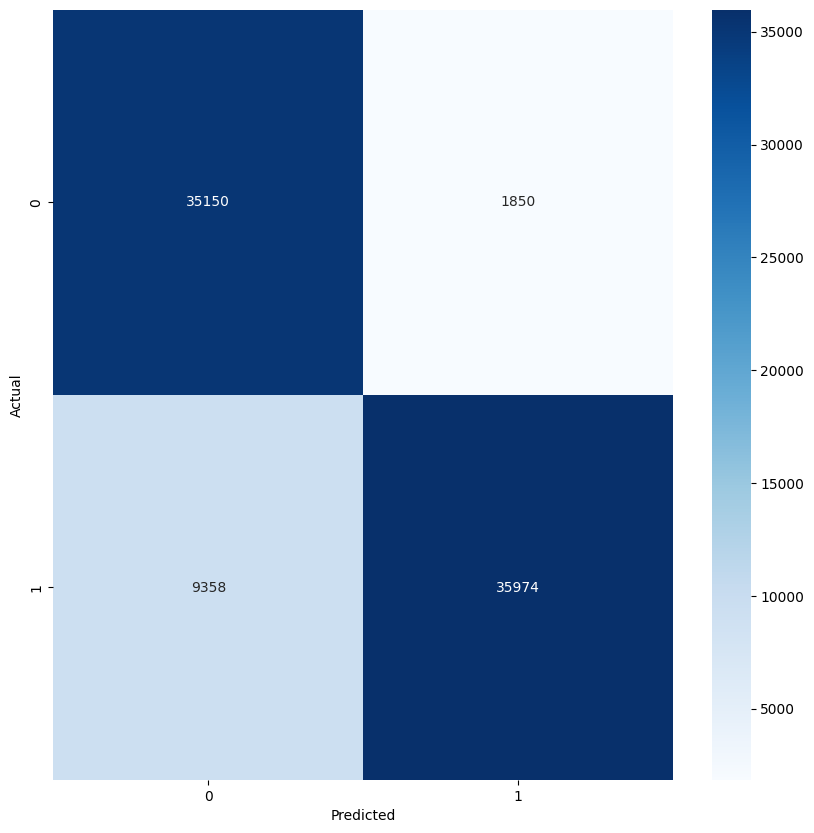

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y, anomaly_flag), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
print("\nClassification Report:")
print(classification_report(y, anomaly_flag))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     37000
           1       0.95      0.79      0.87     45332

    accuracy                           0.86     82332
   macro avg       0.87      0.87      0.86     82332
weighted avg       0.88      0.86      0.86     82332



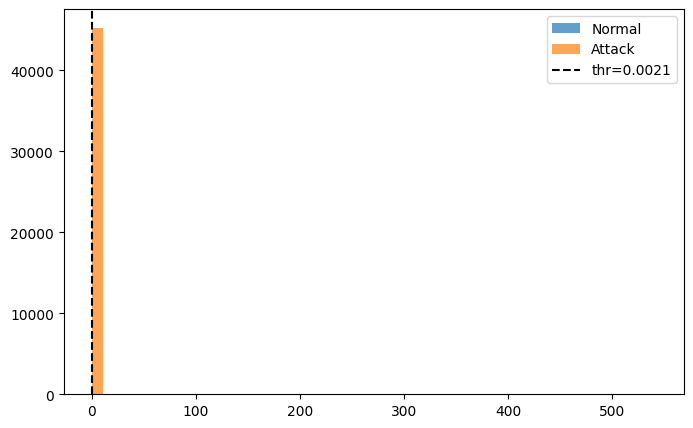

In [12]:
plt.figure(figsize=(8,5))
plt.hist(mse[y == 0], bins=50, alpha=0.7, label="Normal")
plt.hist(mse[y == 1], bins=50, alpha=0.7, label="Attack")
plt.axvline(threshold, color="k", linestyle="--", label=f"thr={threshold:.4f}")
plt.legend()
plt.show()